# Persiapan

Import modul, Connect Google Drive

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
train = pd.read_csv('/content/drive/MyDrive/Dataset   /titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dataset   /titanic/test.csv')

In [153]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [155]:
train.shape, test.shape

((891, 12), (418, 11))

In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualisasi Data

In [159]:
train["Sex"].value_counts()

,count
Sex,
male,577
female,314


In [162]:
count_sex = train['Sex'].value_counts()

index_set = count_sex.index
values_sex = count_sex.values

In [163]:
index_set

Index(['male', 'female'], dtype='object', name='Sex')

In [164]:
values_sex

array([577, 314])

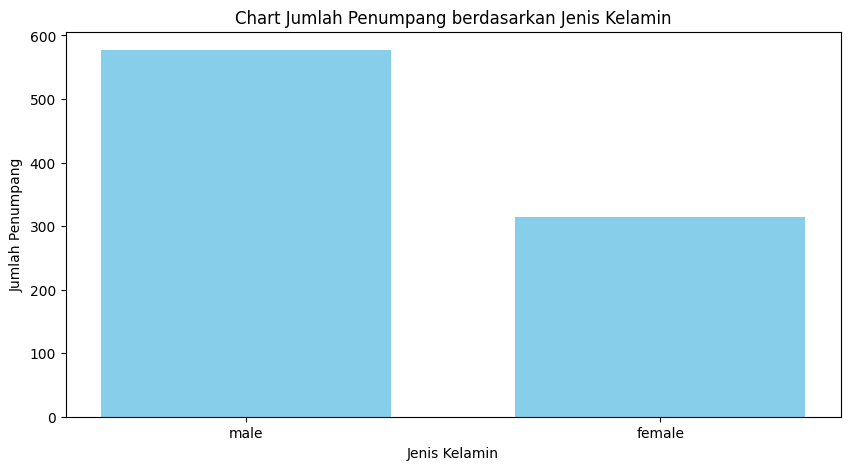

In [165]:
fig = plt.figure(figsize = (10, 5))
plt.bar(index_set , values_sex, color = "skyblue", width = 0.7)

plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Penumpang")
plt.title("Chart Jumlah Penumpang berdasarkan Jenis Kelamin")

plt.show()

In [166]:
def barchart(column):
  count = train[column].value_counts()

  index = count.index
  values = count.values

  fig = plt.figure(figsize = (10, 5))
  plt.bar(index, values, color = "skyblue", width = 0.7)

  plt.show()

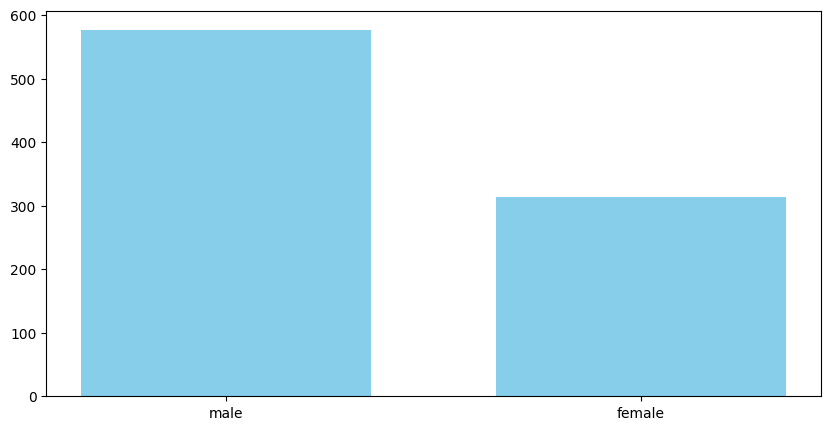

In [167]:
barchart("Sex")

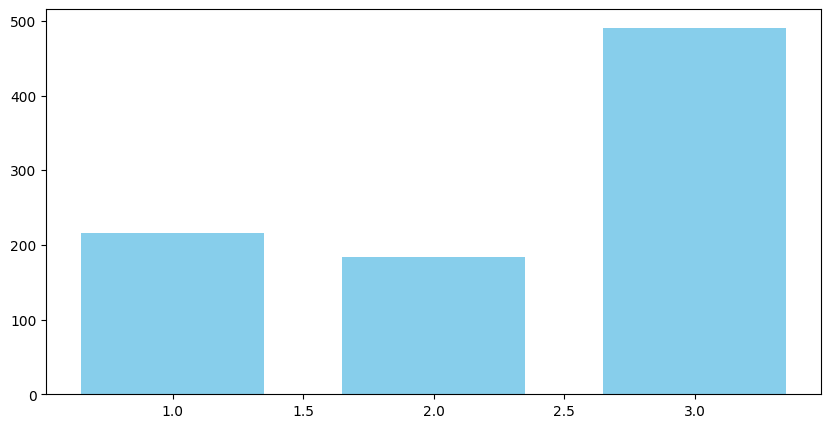

In [168]:
barchart("Pclass")

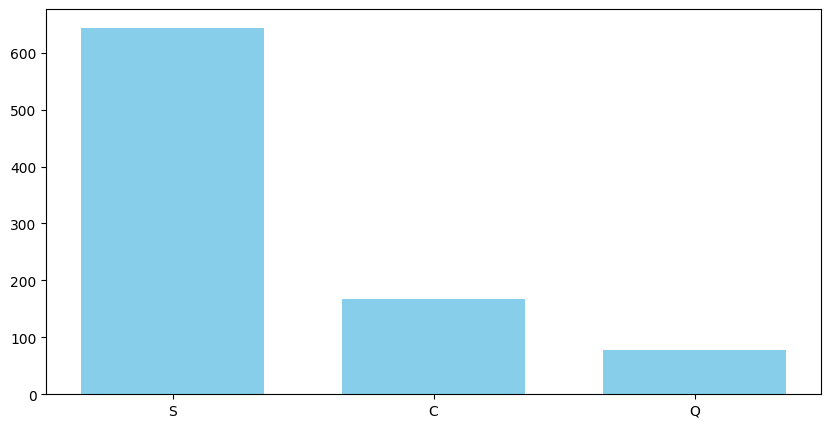

In [169]:
barchart("Embarked")

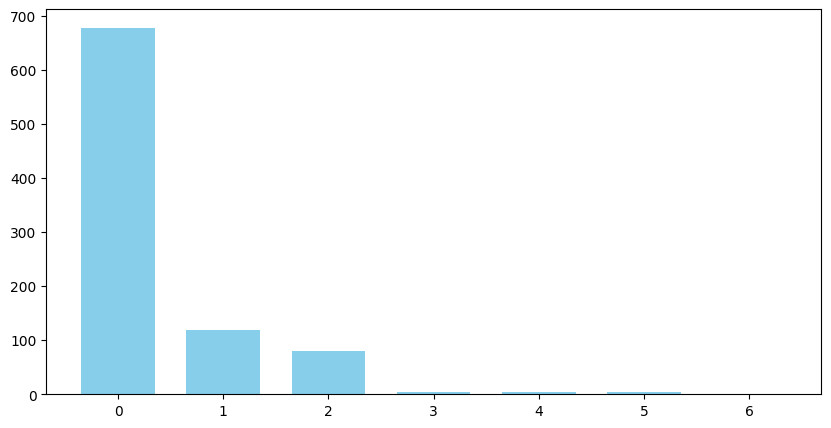

In [170]:
barchart("Parch")

In [171]:
survived = train.groupby(['Survived', "Sex"]).count()['PassengerId'].reset_index()
survived

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


In [172]:
def group_barchart(column):
  survived = train.groupby(["Survived", column]).count()['PassengerId'].reset_index()

  g = sns.catplot(
      data = survived, kind = "bar",
    x = "Survived", y = "PassengerId", hue = column,
    palette = "dark", height = 6
  )

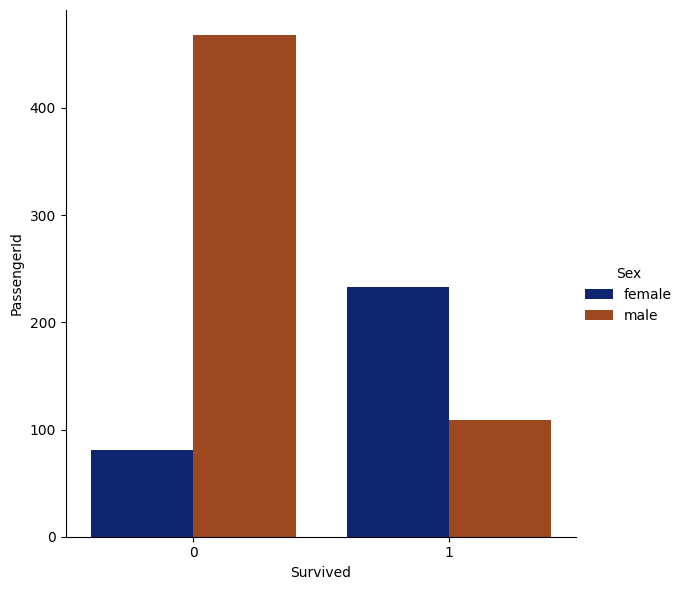

In [85]:
group_barchart("Sex")

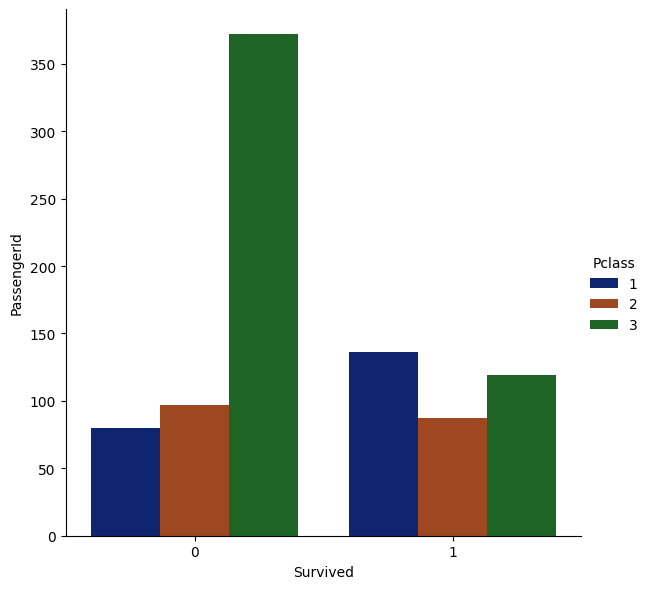

In [173]:
group_barchart("Pclass")

<function matplotlib.pyplot.show(close=None, block=None)>

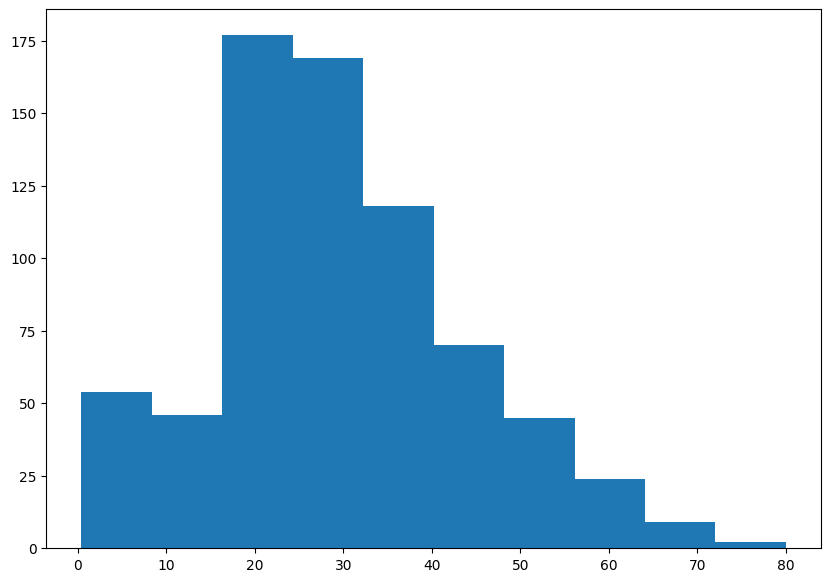

In [174]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(train.Age)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

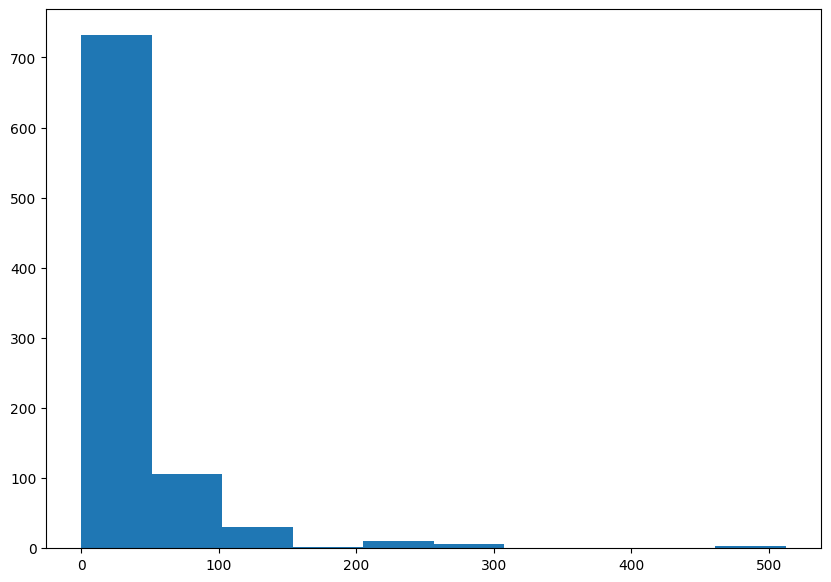

In [175]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.hist(train.Fare)

plt.show

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


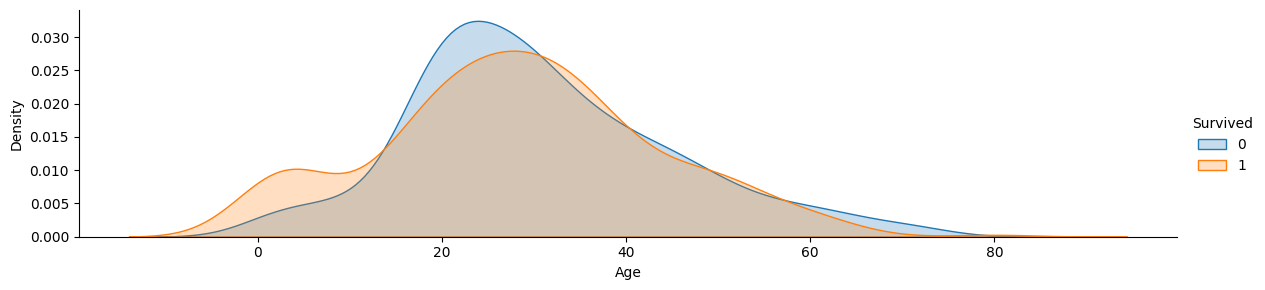

In [176]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


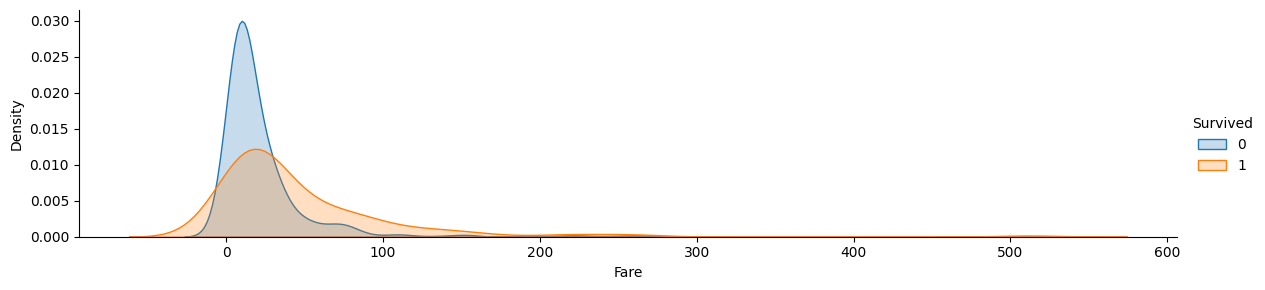

In [177]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Fare", shade = True)
facet.add_legend()
plt.show()

# Preprocessing Data

## Mengisi Missing Value

In [180]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [181]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


## Mengisi Missing Value Categorical Data

In [182]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [183]:
train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [184]:
modus_embarked = train['Embarked'].mode()[0]
modus_embarked

'S'

In [185]:
train['Embarked'] = train['Embarked'].fillna(modus_embarked)

In [186]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Missing Value Data Age

In [187]:
mean_age = train['Age'].mean()
mean_age

29.69911764705882

In [188]:
train['Age'] = train['Age'].fillna(mean_age)

In [189]:
mean_age_test = test['Age'].mean()
mean_age_test

30.272590361445783

In [190]:
test['Age'] = test['Age'].fillna(mean_age_test)

## Missing Value Data Fare

In [191]:
mean_fare_test = test['Fare'].mean()

test['Fare'] = test['Fare'].fillna(mean_fare_test)

## Drop Data Cabin

In [192]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [193]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [194]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


## Convert Data To Numberic

### Convert Data Sex

In [195]:
sex_mapping = {"male" : 1, "female" : 0}

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

### Convert Data Embarked

In [196]:
embarked = train[['Embarked']]
dummies = pd.get_dummies(embarked, dtype=int)

dummies.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [197]:
train = pd.merge(train.reset_index(), dummies.reset_index())
train.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,1


In [198]:
train = train.drop(['index', 'Embarked'], axis = 1)

In [199]:
embarked_test = test[['Embarked']]
dummies_test = pd.get_dummies(embarked, dtype=int)


In [200]:
test = pd.merge(test.reset_index(), dummies_test.reset_index())

test = test.drop(['index', 'Embarked'], axis = 1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,1


### Extract Data Title Name and Convert Tittle

In [201]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [202]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,Mr


In [203]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

train['Title'] = train['Title'].map(title_mapping)

In [204]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,0


In [205]:
test['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [206]:
test['Title'] = test['Title'].map(title_mapping)

## Select Column

In [207]:
train.shape, test.shape

((891, 14), (418, 13))

In [208]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,0


In [209]:
train = train.drop(["PassengerId",'Name' , "Ticket"], axis = 1 )

In [216]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,1,22.0,1,0,7.2500,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,2
2,1,3,0,26.0,0,0,7.9250,0,0,1,1
3,1,1,0,35.0,1,0,53.1000,0,0,1,2
4,0,3,1,35.0,0,0,8.0500,0,0,1,0


In [218]:
# Menghapus spasi atau karakter tersembunyi lainnya dari nama kolom
train.columns = train.columns.str.strip()

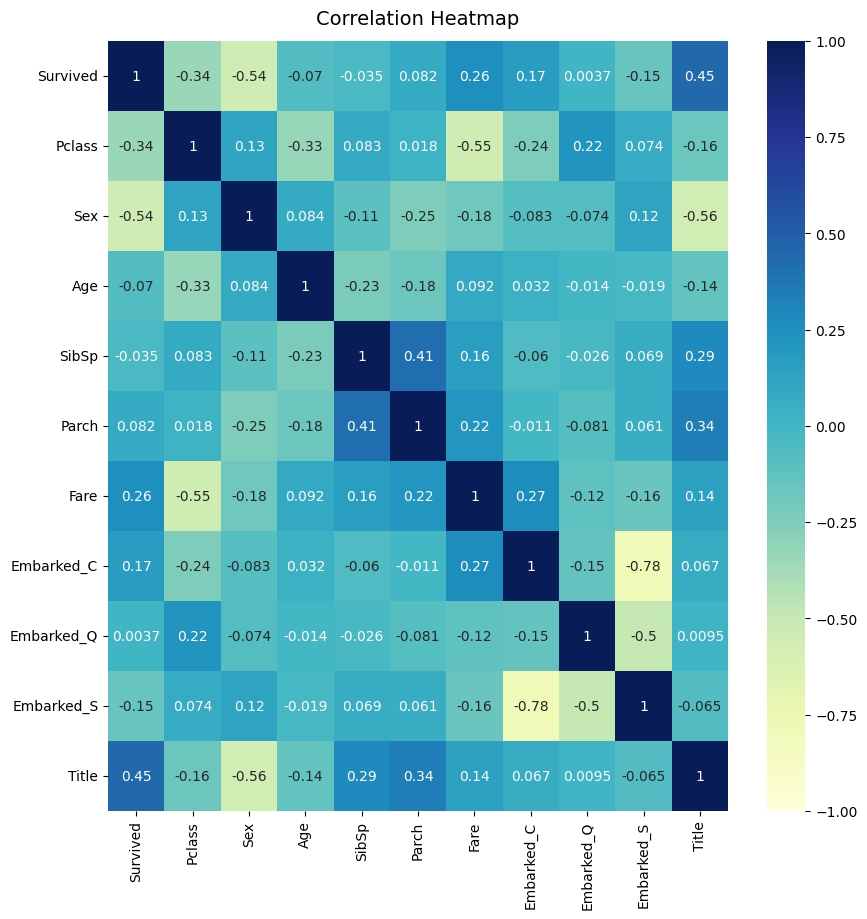

In [221]:
# Membuat heatmap korelasi
fig, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(train[['Survived', 'Pclass', 'Sex', 'Age',
                             'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title']].corr(),
                      vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
plt.show()

In [ ]:
# test = test.drop(["PassengerId",'Name' , "Ticket"], axis = 1 )

In [223]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,34.5,0,0,7.8292,0,0,1,0
1,3,0,47.0,1,0,7.0000,1,0,0,2
2,2,1,62.0,0,0,9.6875,0,0,1,1
3,3,1,27.0,0,0,8.6625,0,0,1,2
4,3,0,22.0,1,1,12.2875,0,0,1,0


# Modelling

In [224]:
from sklearn.model_selection import KFold

In [225]:
train.shape, test.shape

((891, 11), (418, 10))

In [226]:
train_data = train.drop("Survived", axis = 1)
target = train['Survived']

In [227]:
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78212291 0.78651685 0.78089888 0.8258427  0.82022472]


In [228]:
score.mean()

0.7991212102190698

In [229]:
# Menggunakan cross_val_predict untuk mendapatkan prediksi
y_pred = cross_val_predict(clf, train_data, target, cv=K_fold)

In [230]:
# Function untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

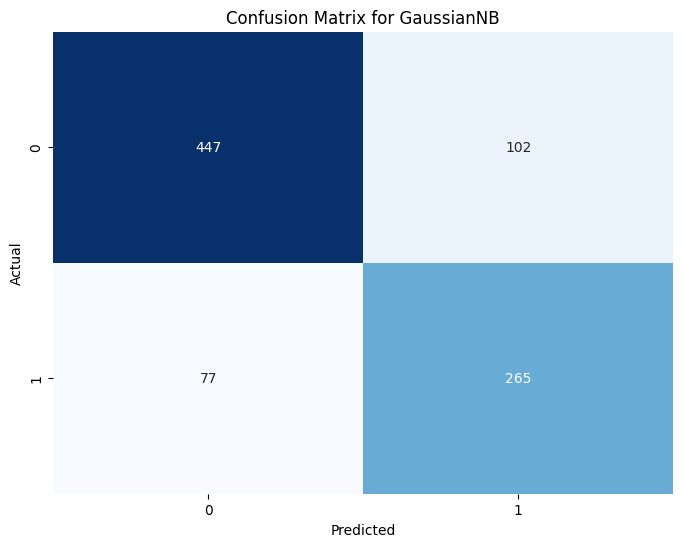

In [134]:
# Plot Confusion Matrix untuk GaussianNB
plot_confusion_matrix(target, y_pred, 'Confusion Matrix for GaussianNB')

In [231]:
# Metik Evaluasi
print("Evaluasi untuk GaussianNB:")
print("\nAccuracy:", accuracy_score(target, y_pred))
print("Precision:", precision_score(target, y_pred))
print("Recall:", recall_score(target, y_pred))
print("F1 Score:", f1_score(target, y_pred))
print("\nClassification Report:\n", classification_report(target, y_pred))

Evaluasi untuk GaussianNB:

Accuracy: 0.7991021324354658
Precision: 0.7220708446866485
Recall: 0.7748538011695907
F1 Score: 0.7475317348377999

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       549
           1       0.72      0.77      0.75       342

    accuracy                           0.80       891
   macro avg       0.79      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



In [232]:
K_fold = KFold(n_splits=5, shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.73743017 0.79775281 0.79213483 0.76966292 0.79213483]


In [233]:
score.mean()

0.7778231121712385

In [234]:
# Menggunakan cross_val_predict untuk mendapatkan prediksi DecisionTreeClassifier
y_pred_dt = cross_val_predict(clf, train_data, target, cv=k_fold)

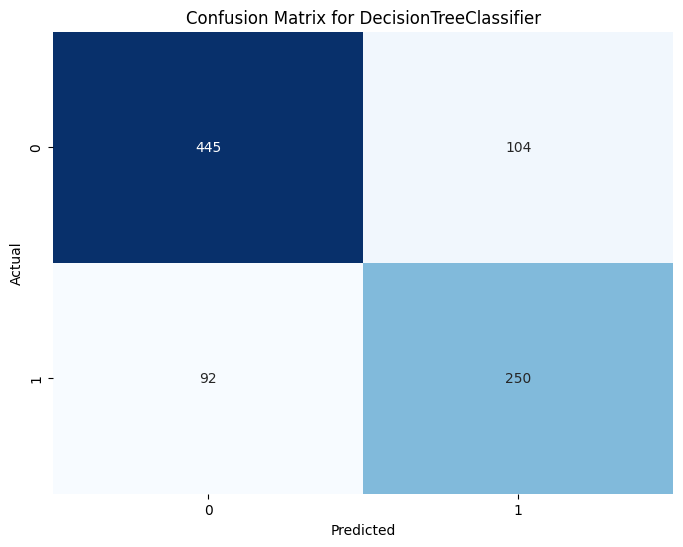

In [139]:
# Plot Confusion Matrix untuk DecisionTreeClassifier
plot_confusion_matrix(target, y_pred_dt, 'Confusion Matrix for DecisionTreeClassifier')

In [235]:
# Metrik Evaluasi
print("Evaluasi untuk DecisionTreeClassifier:")
print("\nAccuracy:", accuracy_score(target, y_pred_dt))
print("Precision:", precision_score(target, y_pred_dt))
print("Recall:", recall_score(target, y_pred_dt))
print("F1 Score:", f1_score(target, y_pred_dt))
print("\nClassification Report:\n", classification_report(target, y_pred_dt))

Evaluasi untuk DecisionTreeClassifier:

Accuracy: 0.7789001122334456
Precision: 0.7030812324929971
Recall: 0.7339181286549707
F1 Score: 0.7181688125894135

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       549
           1       0.70      0.73      0.72       342

    accuracy                           0.78       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.78      0.78      0.78       891



In [236]:
# Menghitung ROC Curve dan AUC untuk GaussianNB
fpr_nb, tpr_nb, _ = roc_curve(target, y_pred)
roc_auc_nb = auc(fpr_nb, tpr_nb)

In [237]:
# Menghitung ROC Curve dan AUC untuk DecisionTreeClassifier
fpr_dt, tpr_dt, _ = roc_curve(target, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [238]:
# Function untuk plot ROC Curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

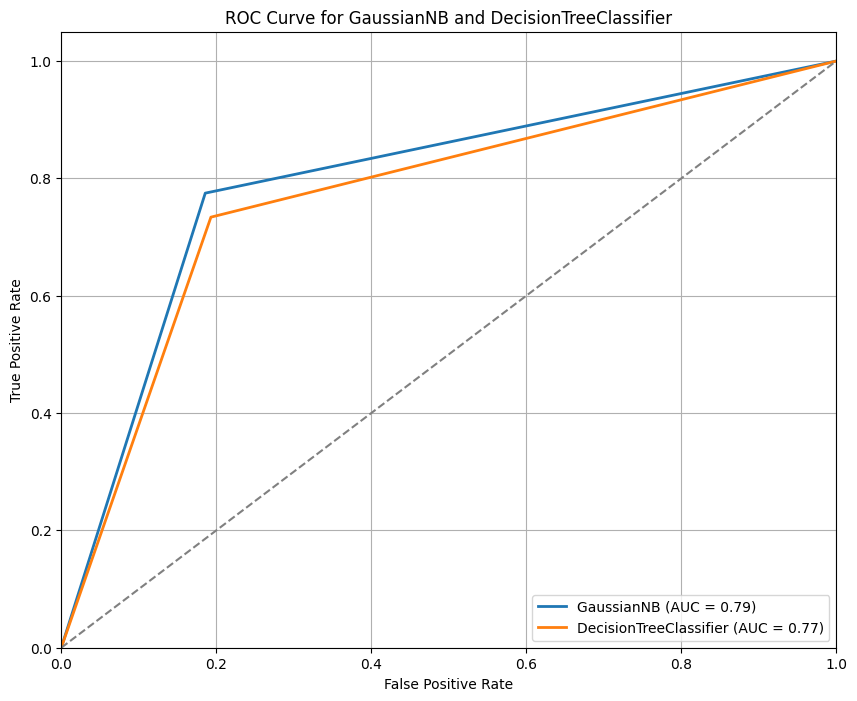

In [239]:
# Plot ROC Curve
plt.figure(figsize=(10, 8))
plot_roc_curve(fpr_nb, tpr_nb, roc_auc_nb, 'GaussianNB')
plot_roc_curve(fpr_dt, tpr_dt, roc_auc_dt, 'DecisionTreeClassifier')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal untuk baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianNB and DecisionTreeClassifier')
plt.legend(loc="lower right")
plt.grid()
plt.show()